# Testing a medium size Quantum Circuit using simulator

The point of this notebook is to store and also showcase what is the easiest way to build, run and evaluate a Quantum Circuit using  Qiskit from IBM

First move is to install the packages

In [ ]:
pip install qiskit

In [ ]:
pip install qiskit_aer

In [ ]:
pip install pylatexenc

Now we import the necessary libraries

In [10]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler,Sampler
import numpy as np


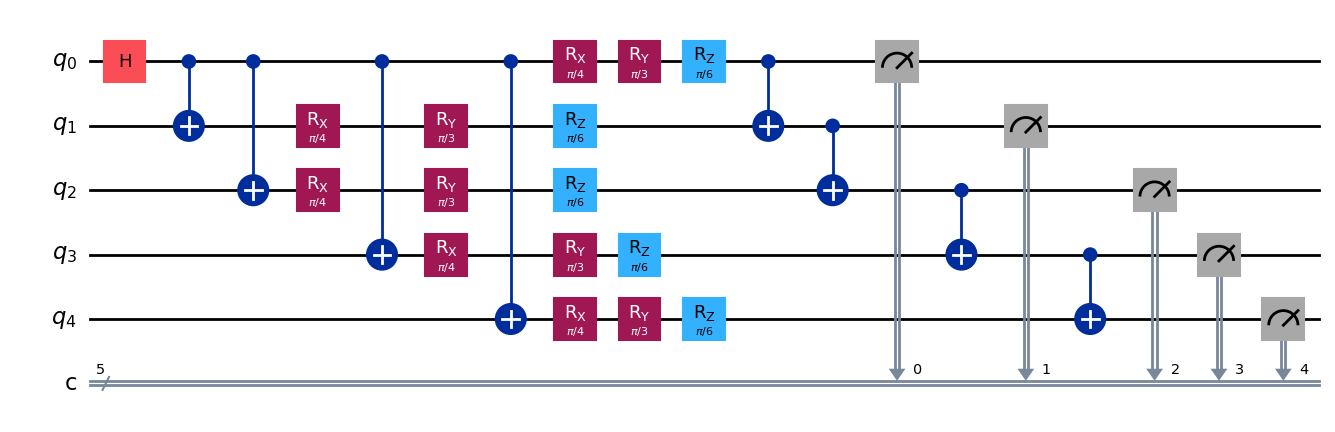

In [6]:
num_qubits = 5
circuit = QuantumCircuit(num_qubits, num_qubits)  # 5 qubits and 5 classical bits


circuit.h(0)  # Hadamard gate on the first qubit
for i in range(1, num_qubits):
    circuit.cx(0, i)  # CNOT gates to entangle qubits

for qubit in range(num_qubits):
    circuit.rx(np.pi / 4, qubit)
    circuit.ry(np.pi / 3, qubit)
    circuit.rz(np.pi / 6, qubit)

for i in range(num_qubits - 1):
    circuit.cx(i, i + 1)

circuit.measure(range(num_qubits), range(num_qubits))

circuit.draw('mpl')

Just like the graph shows us we have created our own Quaantum Circuirt

Now it is time to actual run it and measure the results


ATTENTION!!!!

*** StatevectorSampler***

---- StatevectorSampler is used to obtain the statevector of a quantum circuit after it has been applied.
The statevector provides the complete quantum state, including amplitude and phase information for all possible basis states.

This is not a measurement in the traditional sense but rather a representation of the full quantum state.

In [13]:
# Initialize the AerSimulator
simulator = AerSimulator()

# Create a Sampler instance to run the job
sampler = Sampler()

# Run the circuit using the sampler
job = sampler.run([circuit])

# Retrieve the results
result = job.result()

# Print the sampling results

print([q.binary_probabilities() for q in result.quasi_dists])

print("Measurement probabilities:", result.quasi_dists)

[{'00000': 0.0807883216171408, '00001': 0.0319601966171408, '00010': 0.0319601966171408, '00011': 0.0319601966171408, '00100': 0.0319601966171408, '00101': 0.0456320716171408, '00110': 0.0319601966171408, '00111': 0.0319601966171408, '01000': 0.0319601966171408, '01001': 0.0456320716171408, '01010': 0.0456320716171408, '01011': 0.0456320716171408, '01100': 0.0319601966171408, '01101': 0.0456320716171408, '01110': 0.0319601966171408, '01111': 0.0319601966171408, '10000': 0.0295632408828592, '10001': 0.0158913658828592, '10010': 0.0158913658828592, '10011': 0.0158913658828592, '10100': 0.0158913658828592, '10101': 0.0647194908828592, '10110': 0.0158913658828592, '10111': 0.0158913658828592, '11000': 0.0295632408828592, '11001': 0.0158913658828592, '11010': 0.0158913658828592, '11011': 0.0158913658828592, '11100': 0.0295632408828592, '11101': 0.0158913658828592, '11110': 0.0295632408828592, '11111': 0.0295632408828592}]
Measurement probabilities: [{0: 0.080788321617141, 1: 0.0319601966171

<ipython-input-13-183fabb59d8f>:5: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
